In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
dirty_df = pd.read_csv('data/Food_Inspections.csv')
initial_df = pd.read_csv('data/Food-Inspections-Initial.csv')
final_df = pd.read_csv('data/Food-Inspections-Final.csv')

In [38]:
# Initialize dirty_df and facility_props_dirty
dirty_df['Inspection Date'] = pd.to_datetime(dirty_df['Inspection Date'])
dirty_df['Year'] = dirty_df['Inspection Date'].dt.year

passing_facilities = dirty_df[dirty_df['Results'] == 'Pass']
facility_counts_by_year = passing_facilities.groupby(['Facility Type', 'Year']).size()
facility_counts_by_year = facility_counts_by_year.rename('Passing Count').reset_index()

total_facilities_by_year = dirty_df.groupby(['Facility Type', 'Year']).size()
total_facilities_by_year = total_facilities_by_year.rename('Total Count').reset_index()

facility_props_dirty = pd.merge(facility_counts_by_year, total_facilities_by_year, on=['Facility Type', 'Year'])
facility_props_dirty['Passing Proportion'] = facility_props_dirty['Passing Count'] / facility_props_dirty['Total Count']

In [39]:
# Initialize initial_df and facility_props_initial
initial_df['Inspection Date'] = pd.to_datetime(initial_df['Inspection Date'])
initial_df['Year'] = initial_df['Inspection Date'].dt.year

passing_facilities = initial_df[initial_df['Results'] == 'Pass']
facility_counts_by_year = passing_facilities.groupby(['Facility Type', 'Year']).size()
facility_counts_by_year = facility_counts_by_year.rename('Passing Count').reset_index()

total_facilities_by_year = initial_df.groupby(['Facility Type', 'Year']).size()
total_facilities_by_year = total_facilities_by_year.rename('Total Count').reset_index()

facility_props_initial = pd.merge(facility_counts_by_year, total_facilities_by_year, on=['Facility Type', 'Year'])
facility_props_initial['Passing Proportion'] = facility_props_initial['Passing Count'] / facility_props_initial['Total Count']

In [40]:
# Initialize final_df and facility_props_final
final_df['Inspection Date'] = pd.to_datetime(final_df['Inspection Date'])
final_df['Year'] = final_df['Inspection Date'].dt.year

passing_facilities = final_df[final_df['Results'] == 'Pass']
facility_counts_by_year = passing_facilities.groupby(['Facility Type', 'Year']).size()
facility_counts_by_year = facility_counts_by_year.rename('Passing Count').reset_index()

total_facilities_by_year = final_df.groupby(['Facility Type', 'Year']).size()
total_facilities_by_year = total_facilities_by_year.rename('Total Count').reset_index()

facility_props_final = pd.merge(facility_counts_by_year, total_facilities_by_year, on=['Facility Type', 'Year'])
facility_props_final['Passing Proportion'] = facility_props_final['Passing Count'] / facility_props_final['Total Count']

In [41]:
def passing_prop_graph(df, facility_props):
    df['Inspection Date'] = pd.to_datetime(df['Inspection Date'])
    df['Year'] = df['Inspection Date'].dt.year

    # Create a DataFrame of passing counts by facility type and year
    passing_counts = df[df['Results'] == 'Pass'].groupby(['Facility Type', 'Year']).size()
    passing_counts = passing_counts.rename('Passing Count').reset_index()

    # Create a DataFrame of total counts by facility type and year
    total_counts = df.groupby(['Facility Type', 'Year']).size()
    total_counts = total_counts.rename('Total Count').reset_index()

    # Merge the two DataFrames and calculate the passing proportion
    df = pd.merge(passing_counts, total_counts, on=['Facility Type', 'Year'])
    df['Passing Proportion'] = df['Passing Count'] / df['Total Count']

    # Get the top 10 facility types by average passing proportion
    top_facility_types = df.groupby('Facility Type')['Passing Proportion'].mean().nlargest(10).index

    # Plot the passing proportion by facility type and year
    fig, ax = plt.subplots(figsize=(12, 6))

    for facility_type in top_facility_types:
        data = df[df['Facility Type'] == facility_type]
        ax.plot(data['Year'], data['Passing Proportion'], label=facility_type)

    ax.set_xlabel('Year')
    ax.set_ylabel('Passing Proportion')
    ax.set_title('Passing Proportion by Facility Type and Year')
    ax.legend()
    plt.show()
    
    # Create a histogram of the distribution of the 'Passing Proportion' column
    plt.hist(facility_props['Passing Proportion'], bins=20)

    # Set the title and axis labels
    plt.title('Distribution of Passing Proportion')
    plt.xlabel('Passing Proportion')
    plt.ylabel('Count')

    # Display the plot
    plt.show()

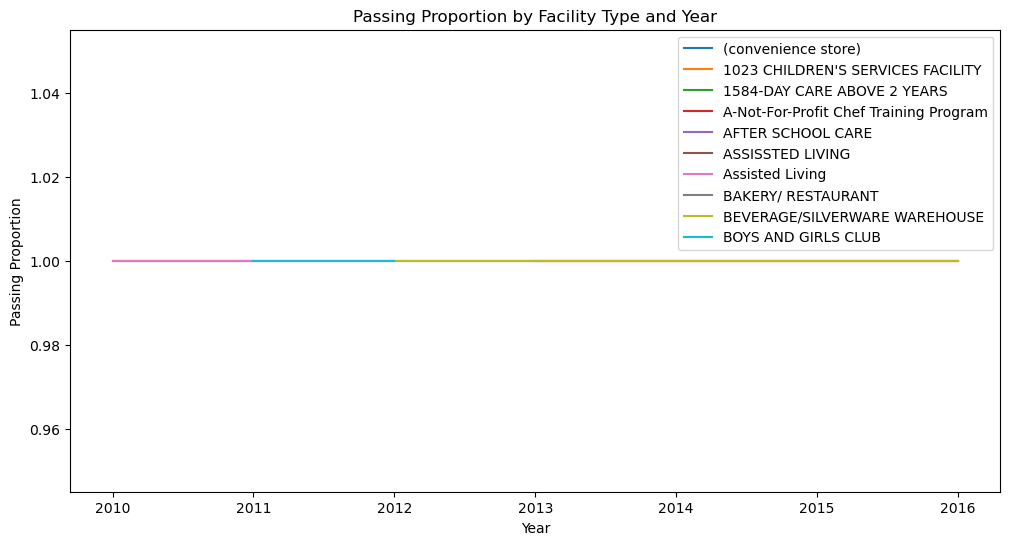

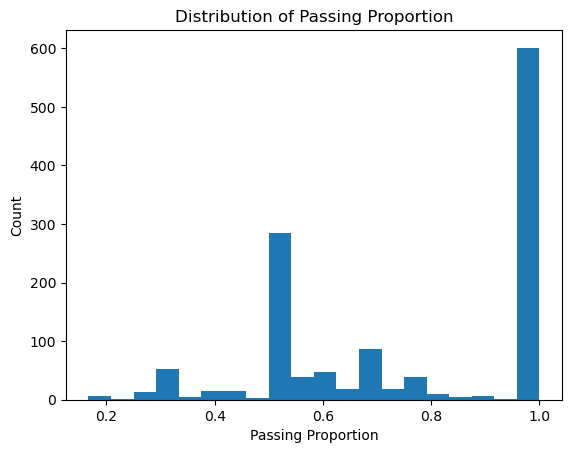

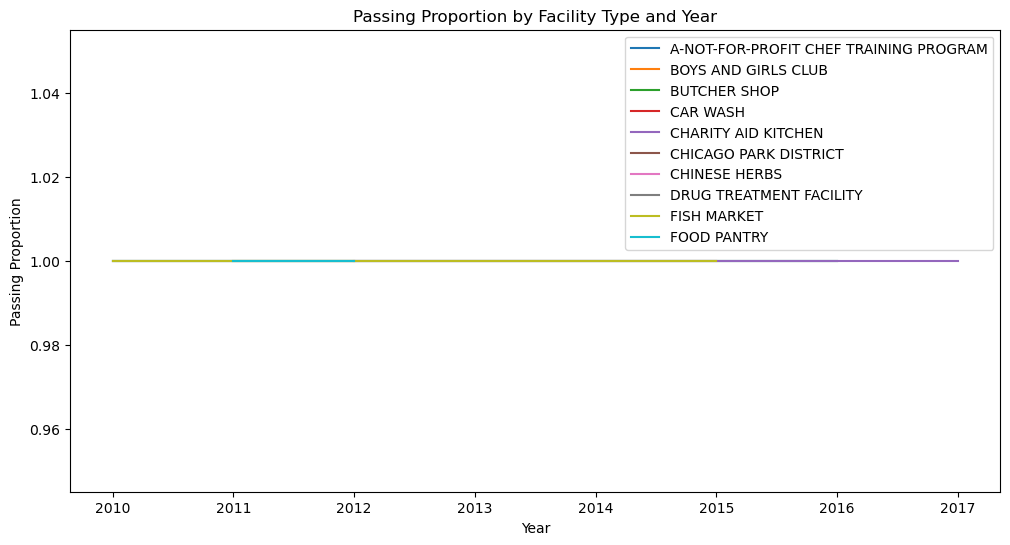

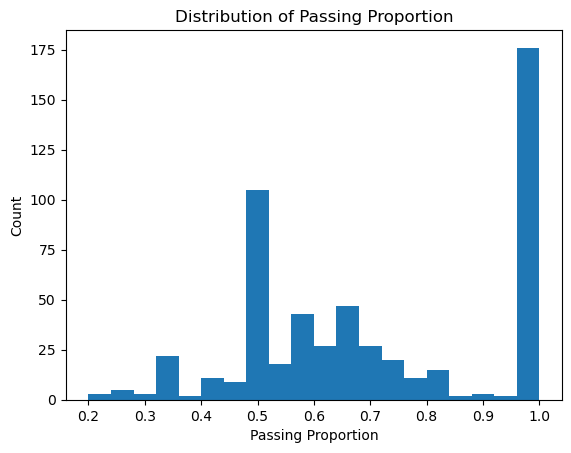

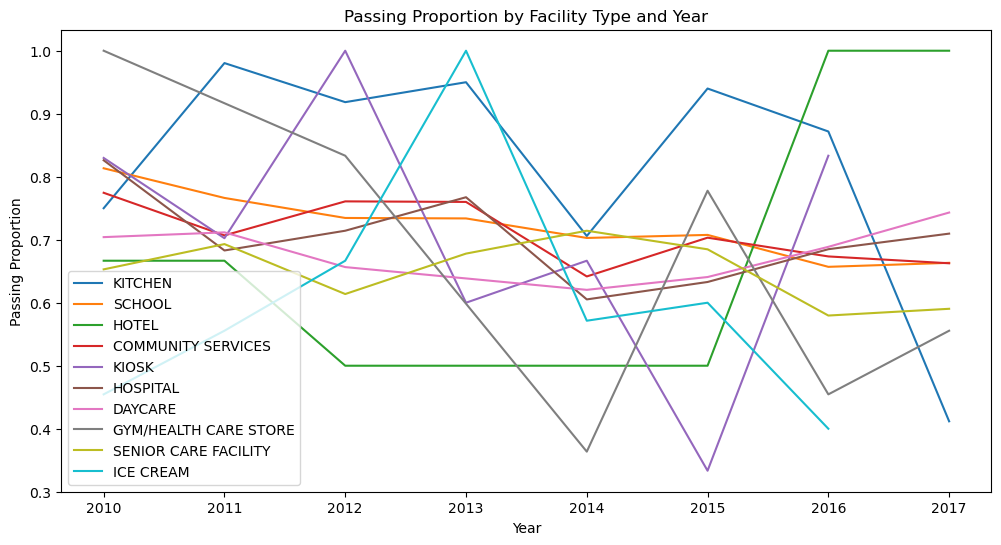

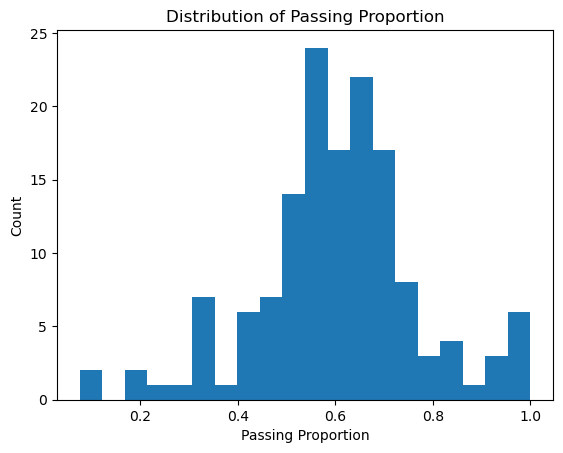

In [42]:
passing_prop_graph(dirty_df, facility_props_dirty)
passing_prop_graph(initial_df, facility_props_initial)
passing_prop_graph(final_df, facility_props_final)